# Machine Learning with Python


In [1]:
# Add Info 

import numpy as np
import pandas as pd
from sklearn import linear_model

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [47]:
boston

{'DESCR': "Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per

In [6]:
df_x = pd.DataFrame(boston.data, columns = boston.feature_names)

In [27]:
df_x.shape

(506, 13)

In [7]:
df_y = pd.DataFrame(boston.target)

In [24]:
df_all = df_x.assign(PRICE = df_y)

In [33]:
df_x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


# Step by Step Guide to build Machine Learning Models

## EDA
1. Under Stand your data 
 * Dimension ( how many rows? how many columns)
    * data.shape 
 * Each Columns
    * Definition 
      * data.columns
    * Categorical vs. Numerical
      * data.dtypes 
    * Distribution of each variable 
      * data.nunique()
      * data.describe()
      * unbalanced class
        * undersample
        * oversample 
        * collect more data 
    * Check for missing values
      * data.isnull().sum()
      * Dealing with missing values: remove missing values
      * Imputation: mean, median, algorithm 
  * Correlation Between each columns 
      * corr = data.corr(), plot heatmap of correlation 
      

 ## Modeling & Evaluation
 1. Split Data into training & test data set 
 2. Define evaluation criteria 
 3. Model & Feature Selection/Engneering 
 
 
 ## Deployment 
 
   


## Boston Housing Price Dataset

Boston Housing Price Dataset provide a wonderful framework to analyze the house price 

1. Economical
   * **TAX**: full-value property-tax rate per $10,000
2. Education
   * **PTRATIO**: pupil teacher ratio by town 
3. Social
   * **CRIM**: per capita crime rate by town
   * **LSTAT**: % lower status of the population
   * **B**: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
4. House
   * **RM** (average number of room per dwelling)
   * **AGE** (proportion of owner-occupied units built prior to 1940)
5. Environment
   * **NOX**: nitric oxides concentration (parts per 10 million
6. Location 
   * **DIS**: weighted distances to five Boston employment centers
   * **RAD**: index of accessibility to radial
   * **INDUS**: proportion of non-retail business acres per town
   * **ZN**：proportion of residential land zoned for lots over 25,000 sq.ft
   * **CHARS**: charles river dummy variable 
   

All the variables are quite self explanatory except INDUS and ZN to me. Per google, ["Non-retail means a business, including an office, warehouse, or other space that does not sell or provide goods or services directly to the ultimate consumer or user."](https://www.lawinsider.com/dictionary/non-retail#:~:text=Non%2Dretail%20means%20a%20business,the%20ultimate%20consumer%20or%20user.). I would assume an appropriate ratio of non retailer business indicate this community enjoys a more diverse business enviornment and thus would be beneficial to the house price. ZN is associated with the term "zoning". A land usage can fall into three categories: [residential, commercial or industrial ](https://www.gimme-shelter.com/zoning-land-use-50039/) and a residential land can not be used for commercial or industrial use and vice versa. Thus, I think the % of residential zone variable here indicate the price can be influenced by which zone the house is in. The property in a good neighbourhood and a house close to a industrial land could have different values.
 



In [50]:
df_all.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


###  Metrics Distribution
The average crime rate per capita is 3.59% and the median is 2.56%. There are some crazy region with crime rate 89%, which is, quite dangerous. Per [macro trend](https://www.macrotrends.net/countries/USA/united-states/crime-rate-statistics), in U.S. the average crime rate is 6.52% in 2021. Boston area is lower vs. other region. Avg of region classify as residential is 11.36%, this number is [75% in new york city](https://www.nyc.gov/site/planning/zoning/districts-tools/residence-districts-r1-r10.page#:~:text=Residence%20districts%20are%20the%20most,the%20city's%20zoned%20land%20area.). Mean of Non retail business is 11.13%, similar with residential zone. On average 7% of house is adjacent to Charles river. Average  nitric oxides concentration is 0.55, way lower vs. [25 ppm ( per occupational safety and health administriation)](https://en.wikipedia.org/wiki/Nitric_oxide#:~:text=In%20the%20U.S.%2C%20the%20Occupational,over%20an%208%2Dhour%20workday.). 

On average there are 6 room per resident and the avaerage % of pre-war building are 68. Weighted distance to the 5 center of boston is 3.79(mile?). On average 10% of households have easy access to highway. Averahge tax per month is 408 and 12.6% are in low social status.

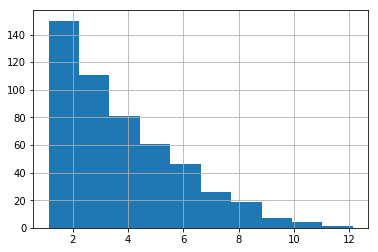

In [37]:
%matplotlib inline
df_x['DIS'].hist()


best fit line:
y = 18.39 + 1.09x


<module 'matplotlib.pyplot' from '/Users/wenxuanzhang/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

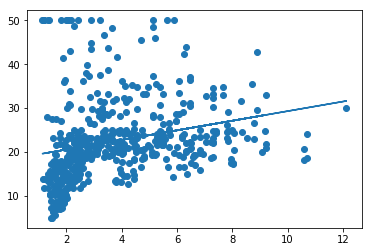

In [43]:
#df_all.plot.scatter(x='DIS', y='PRICE')

# solve for a and b
def best_fit(X, Y):
    import matplotlib.pyplot as plt
    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))
    plt.scatter(X, Y)
    yfit = [a + b * xi for xi in X]
    plt.plot(X, yfit)

    return plt


best_fit(df_all['DIS'], df_all['PRICE'])

Theoretically, the further away the house from the center, the lower the price should be. However, large house with higher is usually built in furthur.

best fit line:
y = -34.67 + 9.10x


<module 'matplotlib.pyplot' from '/Users/wenxuanzhang/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

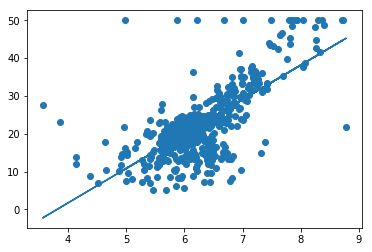

In [44]:
best_fit(df_all['RM'], df_all['PRICE'])

Unsurprisedly, the larger the room, higher the house price.


best fit line:
y = 30.98 + -0.12x


<module 'matplotlib.pyplot' from '/Users/wenxuanzhang/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

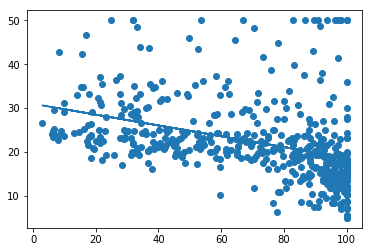

In [46]:
best_fit(df_all['AGE'], df_all['PRICE'])

best fit line:
y = 10.55 + 0.03x


<module 'matplotlib.pyplot' from '/Users/wenxuanzhang/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

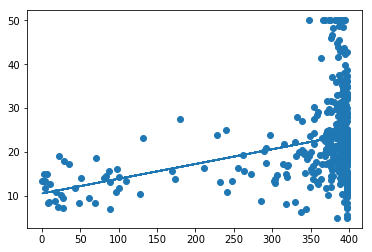

In [48]:
best_fit(df_all['B'], df_all['PRICE'])

best fit line:
y = 62.34 + -2.16x


<module 'matplotlib.pyplot' from '/Users/wenxuanzhang/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

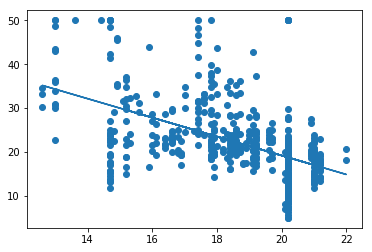

In [49]:
best_fit(df_all['PTRATIO'], df_all['PRICE'])

The lower the PT ratio, the higher the price.

In [51]:
df_all.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

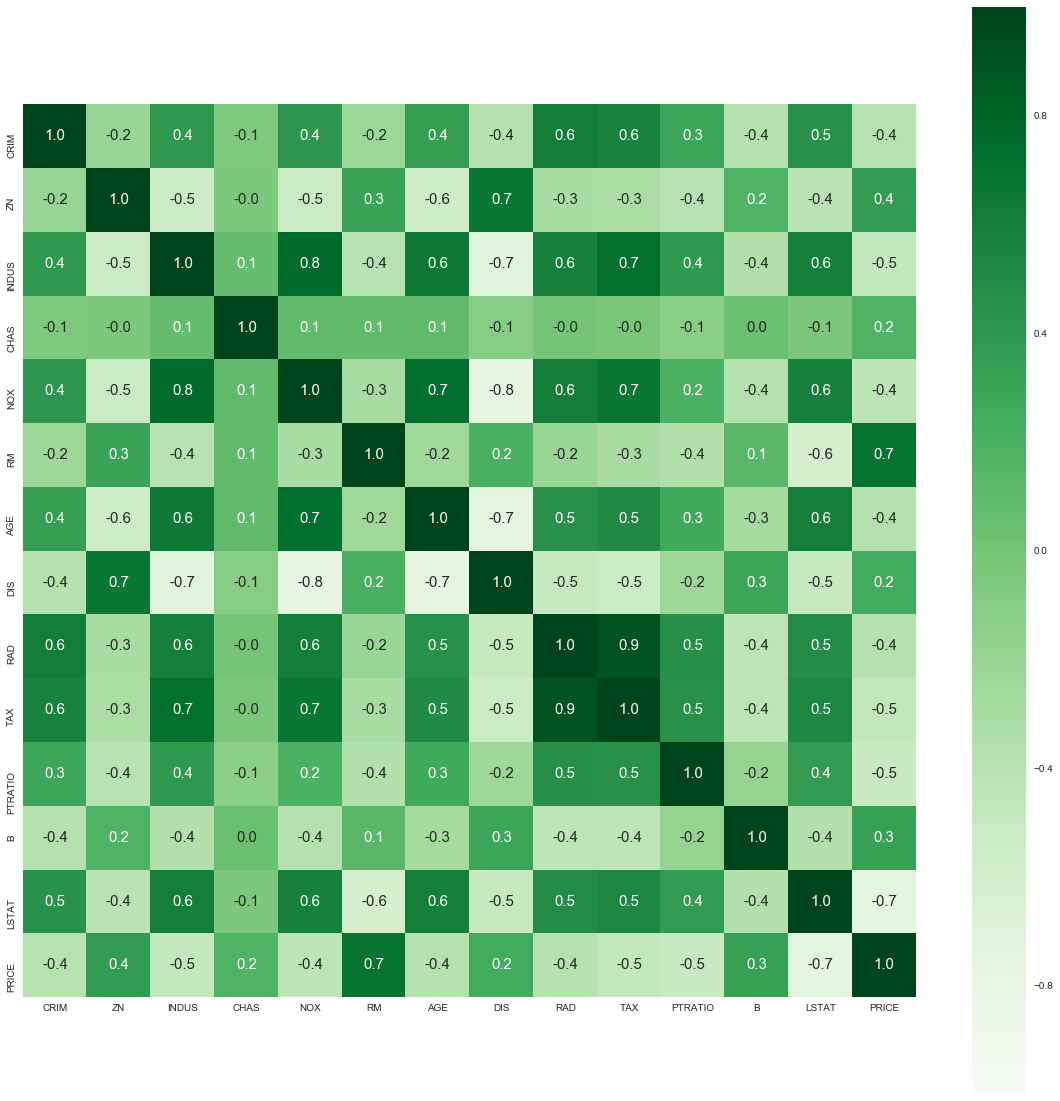

In [53]:
corr = df_all.corr()
corr.shape
plt.figure(figsize=(20,20))
import seaborn as sns

sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

## Reference 
* [Python Machine Learning](https://www.simplilearn.com/tutorials/machine-learning-tutorial/introduction-to-machine-learning)
* [Case Study - Boston Housing](https://thinkingneuron.com/case_studies_python/Boston%20house%20price%20prediction%20case%20study.html)
* [Zoning](https://www.penfield.org/your_government/departments/zoning/zoning_districts.php)
* [Zoning in the United States](https://en.wikipedia.org/wiki/Zoning_in_the_United_States)
* [Kaggle - Boston house price prediction](https://www.kaggle.com/code/shreayan98c/boston-house-price-prediction)

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x,df_y, test_size = 0.3, random_state = 4)

In [56]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [57]:
lm.intercept_


array([ 36.35704138])

In [65]:
lm.coef_.T

array([[ -1.22569795e-01],
       [  5.56776996e-02],
       [ -8.83428230e-03],
       [  4.69344849e+00],
       [ -1.44357828e+01],
       [  3.28008033e+00],
       [ -3.44778157e-03],
       [ -1.55214419e+00],
       [  3.26249618e-01],
       [ -1.40665500e-02],
       [ -8.03274915e-01],
       [  9.35368715e-03],
       [ -5.23477529e-01]])

In [66]:
coeffcients = pd.DataFrame([X_train.columns,lm.coef_.T]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,CRIM,[-0.122569794733]
1,ZN,[0.0556776995968]
2,INDUS,[-0.00883428230073]
3,CHAS,[4.69344848697]
4,NOX,[-14.4357827678]
5,RM,[3.28008032528]
6,AGE,[-0.00344778156538]
7,DIS,[-1.55214419031]
8,RAD,[0.326249618174]
9,TAX,[-0.0140665500317]


## Reference 
* [Python Machine Learning](https://www.simplilearn.com/tutorials/machine-learning-tutorial/introduction-to-machine-learning)
* [Case Study - Boston Housing](https://thinkingneuron.com/case_studies_python/Boston%20house%20price%20prediction%20case%20study.html)
* [Zoning](https://www.penfield.org/your_government/departments/zoning/zoning_districts.php)
* [Zoning in the United States](https://en.wikipedia.org/wiki/Zoning_in_the_United_States)
* [Kaggle - Boston house price prediction](https://www.kaggle.com/code/shreayan98c/boston-house-price-prediction)
* [7 Ways to Handle Missing Values in Machine Learning](https://towardsdatascience.com/7-ways-to-handle-missing-values-in-machine-learning-1a6326adf79e)